# Exploratory Training Data Analysis
- Identifying features > 25% missing to remove
- Identifying extremely correlating features to remove
- Plotting distributions of features
- Plotting selected features by BorutaShap (correlation, covariance, distribution, mutual information, pairwise plots)
- Pairwise-dependence plots of selected features by BorutaShap and their feature-feature interactions.
- Visualization of unsupervised learning (training data groupings in hierarchical clustering and silhoutte plots)

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.io as pio

%matplotlib inline
%config InlineBackend.figure_format ='retina'

pio.renderers.default = "notebook"
import plotly.figure_factory as ff
import plotly.offline as py

py.init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import sys 
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler

plt.style.use("ggplot")
import seaborn as sns

sns.set_style("darkgrid")
sns.mpl.rcParams["figure.figsize"] = (15.0, 9.0)

import re


regex = re.compile(r"\[|\]|<", re.IGNORECASE)


import warnings

warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split

seed = 0

In [43]:
dataset = pd.read_csv("training_data.txt", sep="\t")
dataset = dataset.rename({"IPA_BP": "IPA_BP_annotation"}, axis=1)
data = dataset.drop(["Gene"], 1)
#Y = data["BPlabel"]
data["BPlabel_encoded"] = data["BPlabel"].map(
    {"most likely": 0, "probable": 1, "least likely": 2}
)
Y = data["BPlabel_encoded"]

In [44]:
# dropping features > 25% missing
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame(
    {"column_name": data.columns, "percent_missing": percent_missing}
)
missing_value_df.sort_values("percent_missing", inplace=True)
selection = missing_value_df[missing_value_df["percent_missing"] < 25.00]

dat = data[list(selection["column_name"])]
dat["Gene"] = dataset["Gene"]

dt2 = dat
dat = dat.set_index("Gene")

df = dt2
df = df.set_index("Gene")
df["BPlabel_encoded"] = df["BPlabel"].map(
    {"most likely": 1, "probable": 0.75, "least likely": 0.1}
)

# removing remaining variant-level features strongly correlating with gene length:
df = df.drop(
    [
        "BPlabel",
        "Gene_length",
        "CADD_RAW",
        "gwastrait",
        "HIPred",
        "ppiscore_Exomiser",
        "DNaseCluster_count",
        "H3k4me1_count",
        "CpGcount",
        "EnhancerCount",
        "H3k4me3_count",
        "H3k27Ac_count",
    ],
    1,
    errors="ignore",
)


In [45]:
df1 = MinMaxScaler().fit_transform(df)
imputer = MissForest(random_state=seed)
df1 = pd.DataFrame(imputer.fit_transform(df1), columns=df.columns)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


In [46]:
df2 = pd.read_csv('selected_features_training_data.csv')  
labels = Y


In [47]:
type(df2_pca)

numpy.ndarray

In [48]:
df2_pca_filtered.shape

(121,)

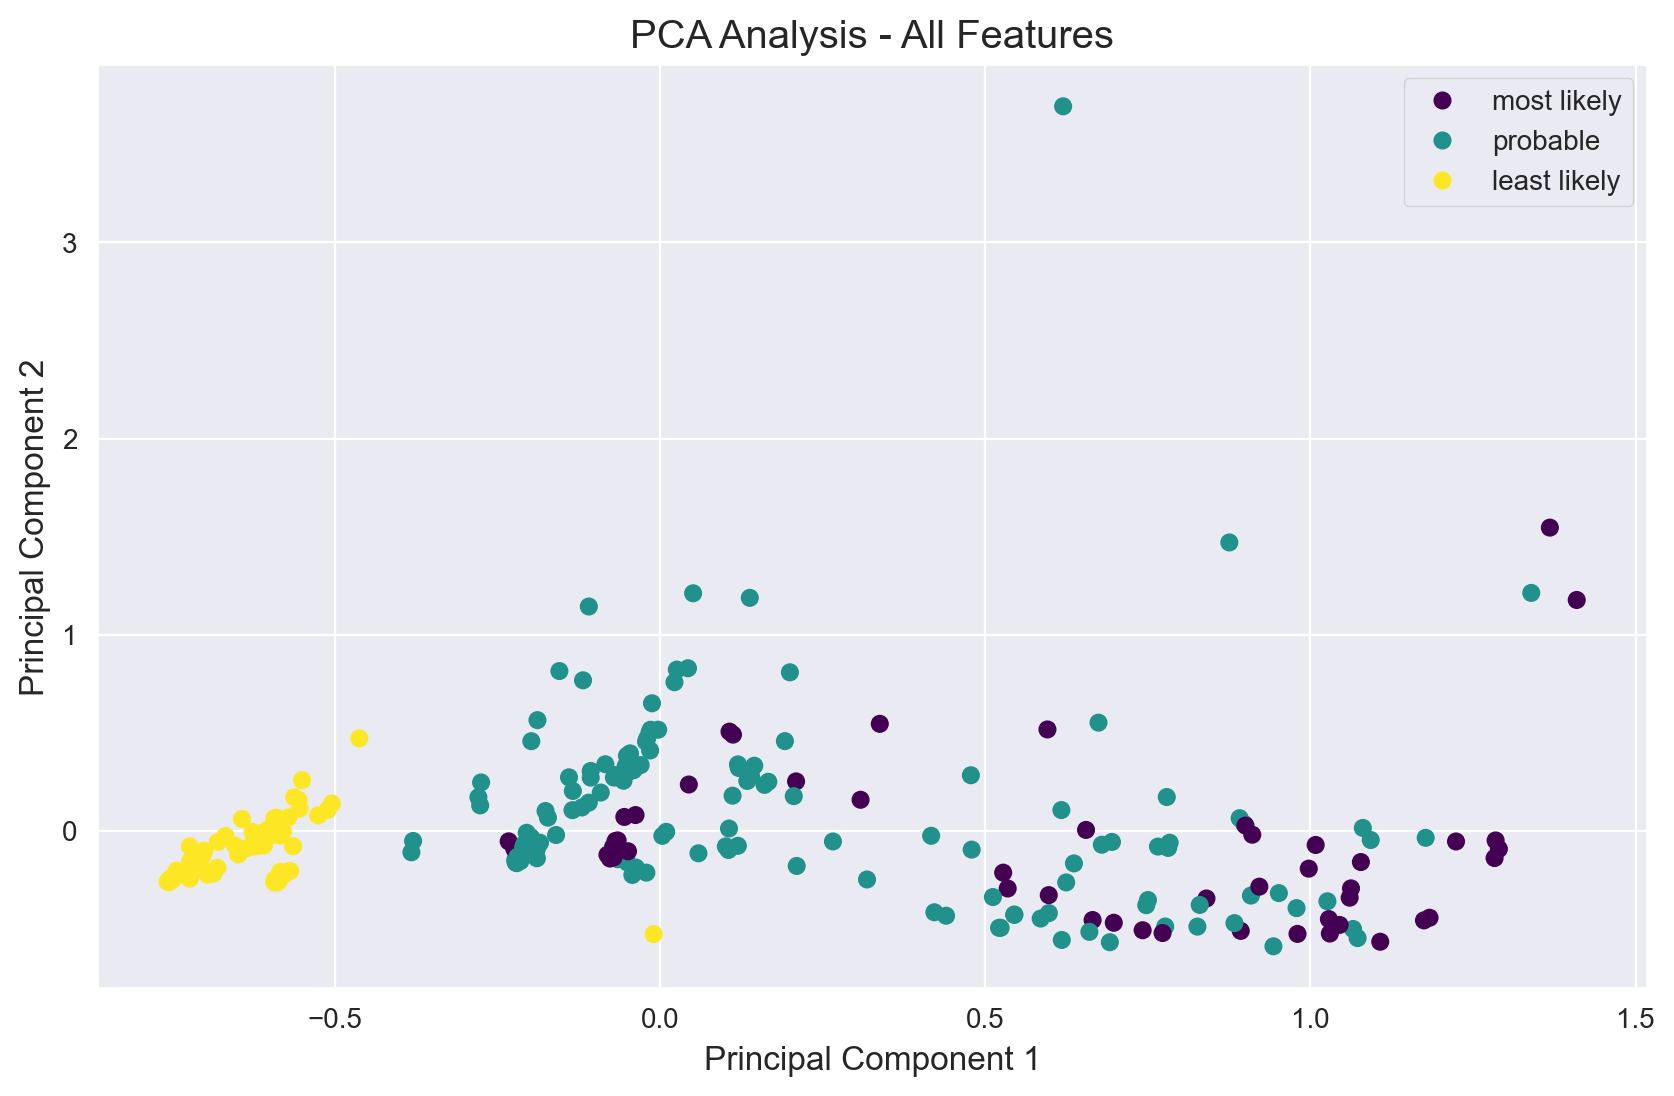

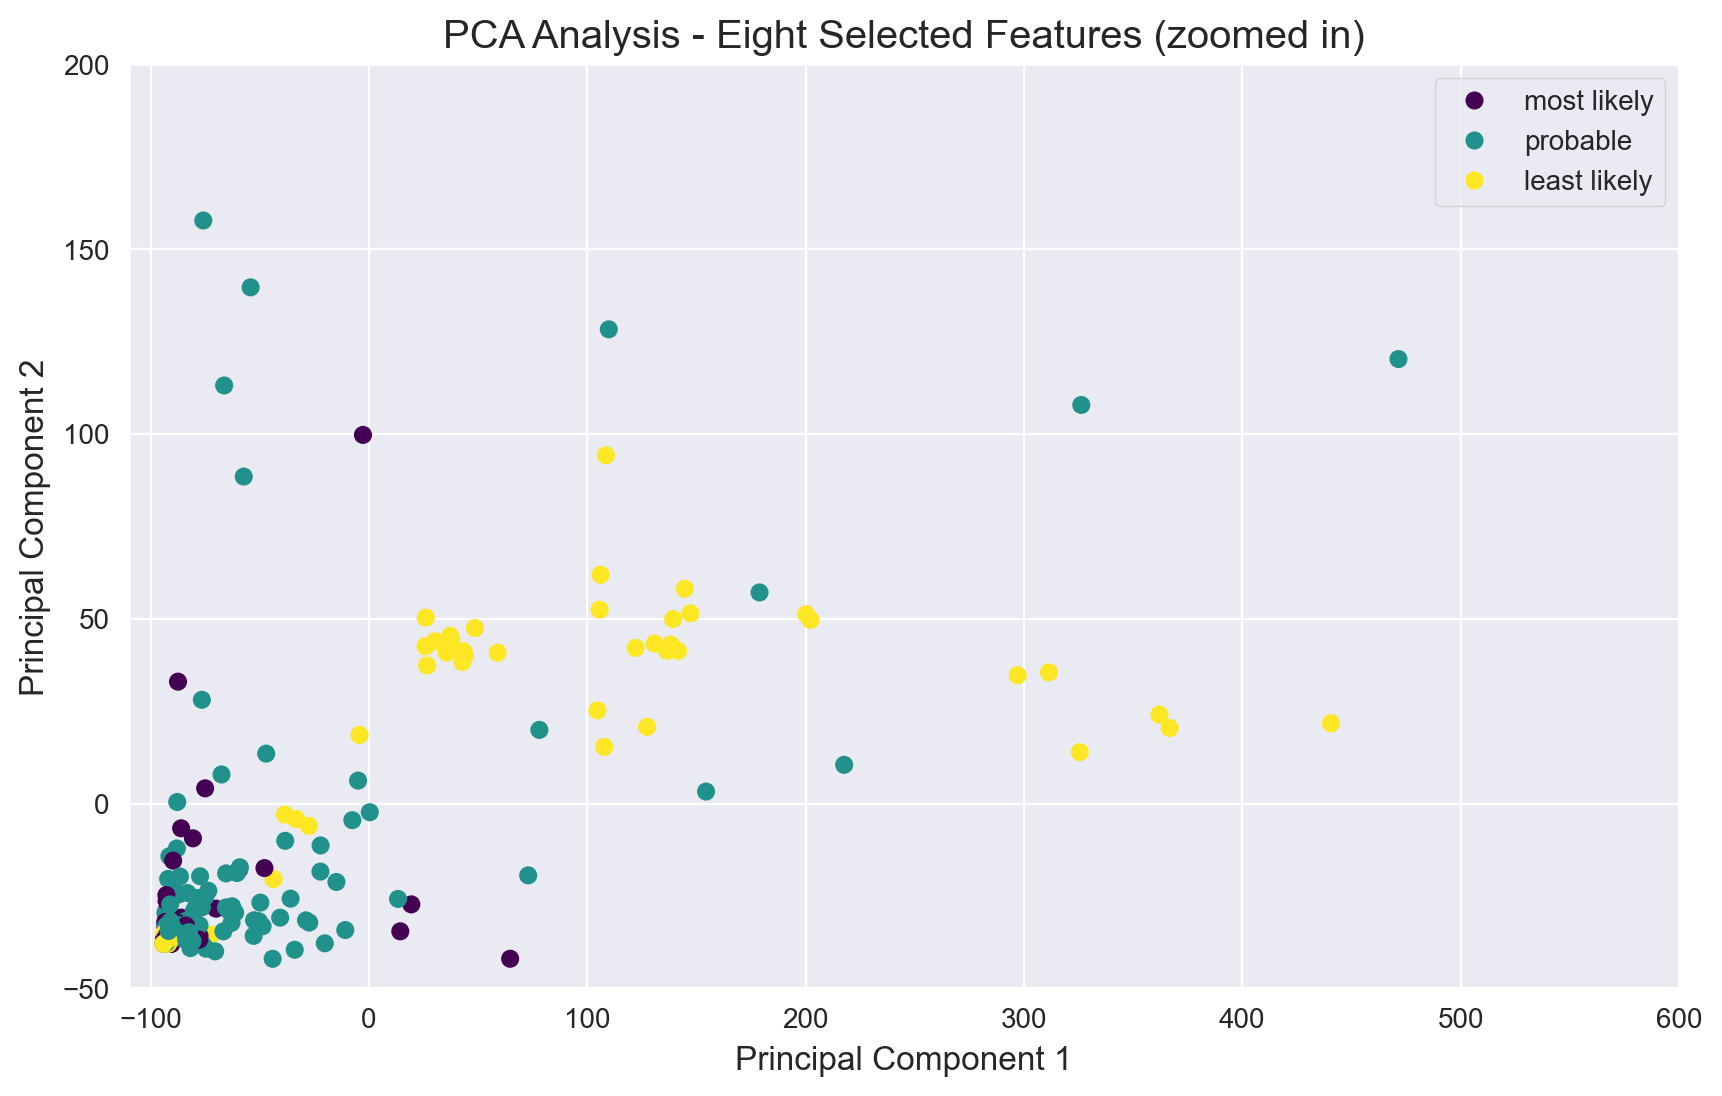

In [49]:
# Perform PCA on df1
pca1 = PCA(n_components=2)  # Set the desired number of components
df1_pca = pca1.fit_transform(df1)

# Perform PCA on df2
pca2 = PCA(n_components=2)  # Set the desired number of components
df2_pca = pca2.fit_transform(df2)

# Create a scatter plot for df1
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df1_pca[:, 0], df1_pca[:, 1], c=labels, cmap='viridis')
plt.title('PCA Analysis - All Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0], labels=['most likely', 'probable', 'least likely'])
plt.show()


# Create a scatter plot for df2 with zoomed-in axis range
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df2_pca[:, 0], df2_pca[:, 1], c=labels, cmap='viridis')
plt.title('PCA Analysis - Eight Selected Features (zoomed in)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Set the axis limits for zooming in
plt.xlim(-110, 600)
plt.ylim(-50,200)

plt.legend(handles=scatter.legend_elements()[0], labels=['most likely', 'probable', 'least likely'])
plt.show()


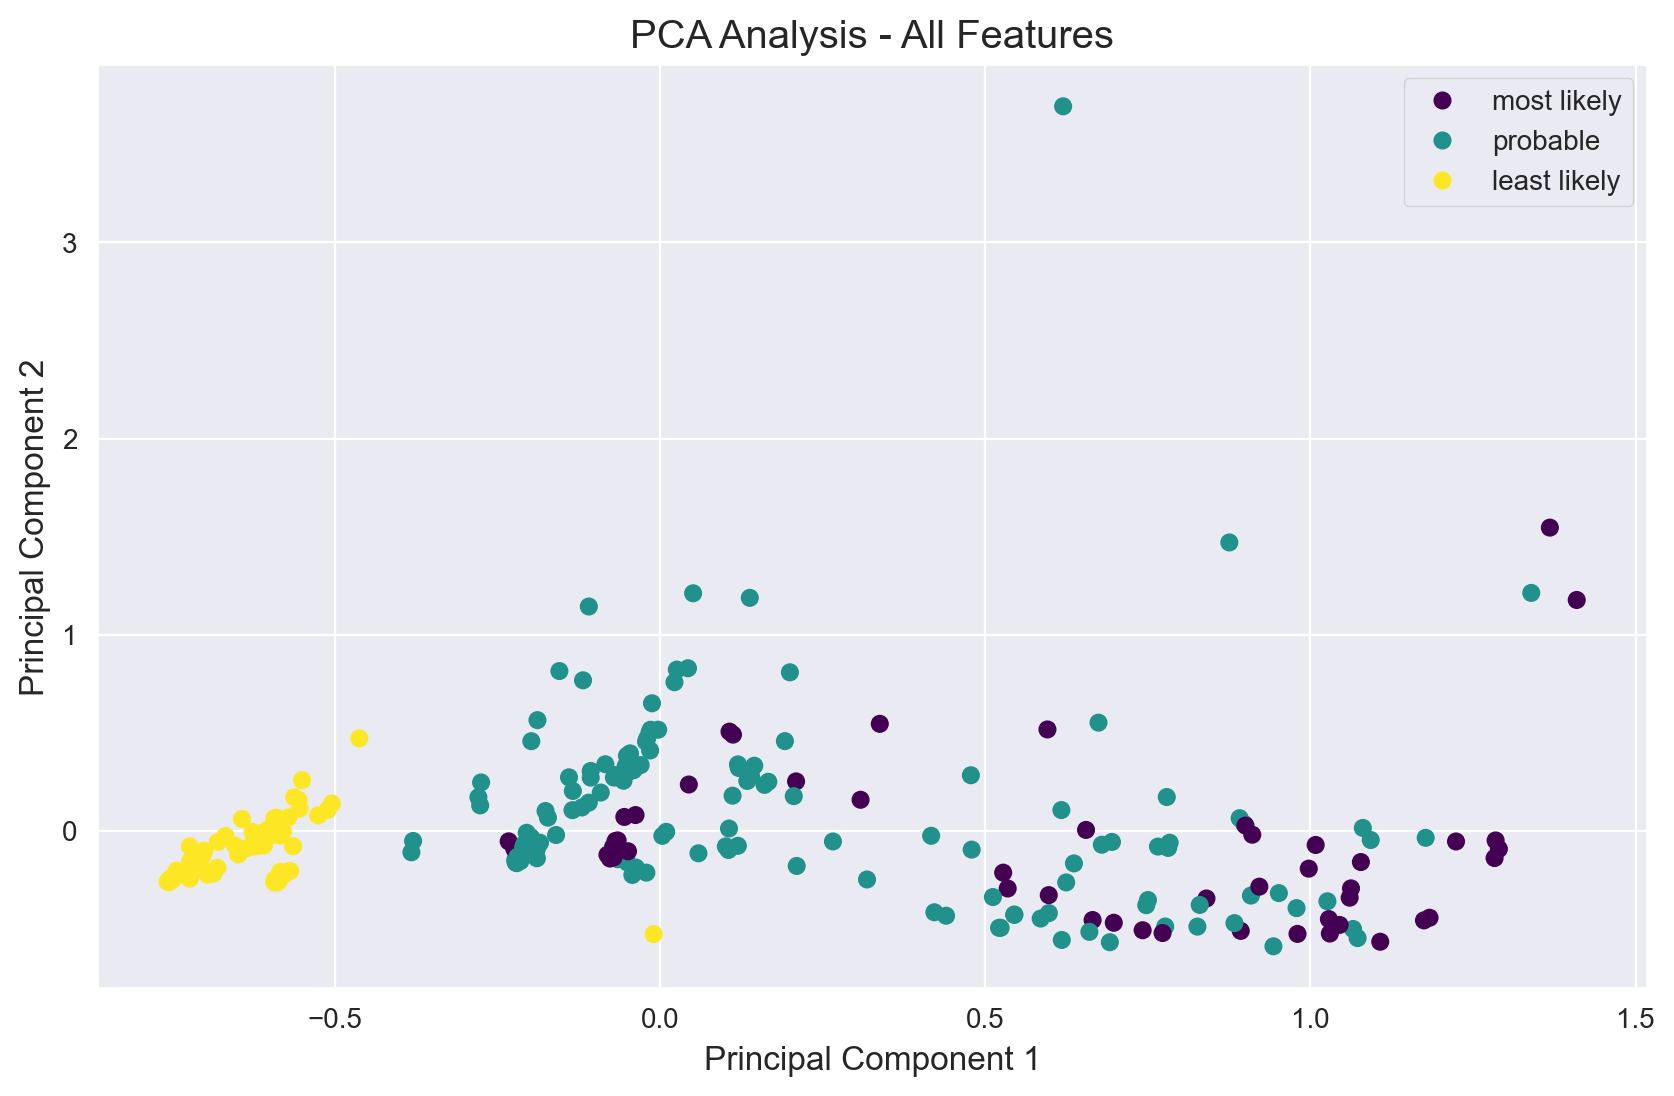

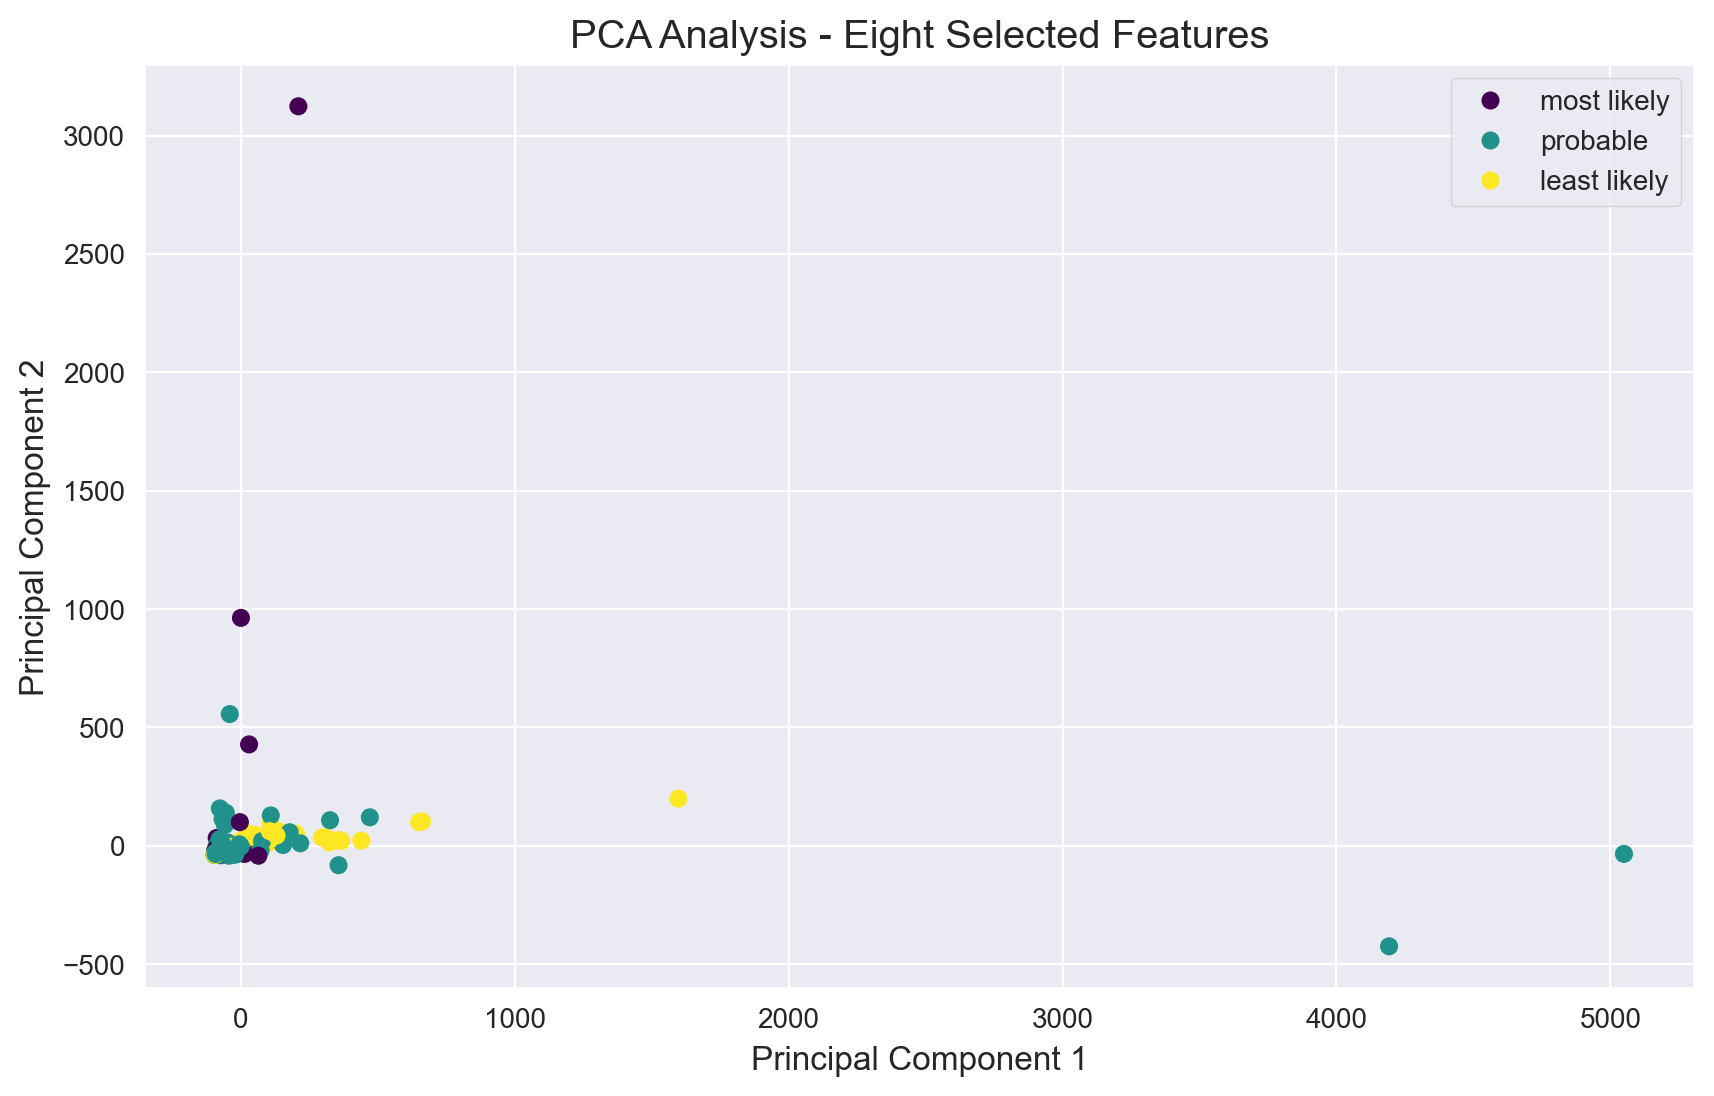

In [50]:
# Perform PCA on df1
pca1 = PCA(n_components=2)  # Set the desired number of components
df1_pca = pca1.fit_transform(df1)

# Perform PCA on df2
pca2 = PCA(n_components=2)  # Set the desired number of components
df2_pca = pca2.fit_transform(df2)

# Create a scatter plot for df1
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df1_pca[:, 0], df1_pca[:, 1], c=labels, cmap='viridis')
plt.title('PCA Analysis - All Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0], labels=['most likely', 'probable', 'least likely'])
plt.show()

# Create a scatter plot for df2
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df2_pca[:, 0], df2_pca[:, 1], c=labels, cmap='viridis')
plt.title('PCA Analysis - Eight Selected Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0], labels=['most likely', 'probable', 'least likely'])
plt.show()
